In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "/notebooks/data/fruits/"
sz=224

In [4]:
files = os.listdir(f'{PATH}valid/Apple Golden 1')[:5]

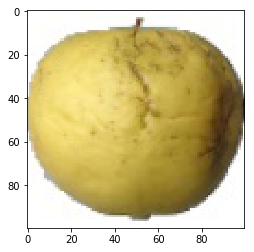

In [7]:
img = plt.imread(f'{PATH}valid/Apple Golden 1/{files[0]}')
plt.imshow(img);

In [8]:
img.shape

(100, 100, 3)

In [9]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:17<00:00, 6427341.60it/s]


100%|██████████| 217/217 [00:31<00:00,  6.79it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.099343   0.086326   0.97939   
    1      0.053276   0.066176   0.980111  



[array([0.06618]), 0.9801109749945953]

In [11]:
lrf=learn.lr_find()

 70%|███████   | 454/646 [00:05<00:02, 87.43it/s, loss=0.153]


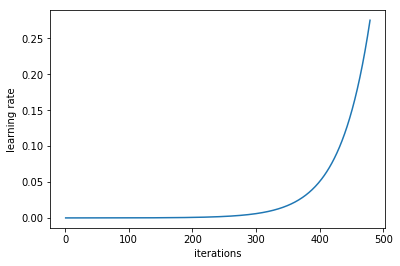

In [12]:
learn.sched.plot_lr()

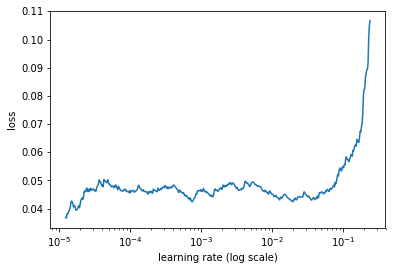

In [13]:
learn.sched.plot()

In [14]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [15]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [16]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.101972   0.091484   0.978381  



[array([0.09148]), 0.9783814945593428]

In [17]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.044118   0.06985    0.98076   
    1      0.039483   0.058938   0.982561  



[array([0.05894]), 0.9825610722778698]

In [18]:
learn.precompute=False

In [19]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.067127   0.0589     0.982201  
    1      0.050988   0.052964   0.983426  
    2      0.048147   0.050824   0.983282  



[array([0.05082]), 0.9832816891258918]

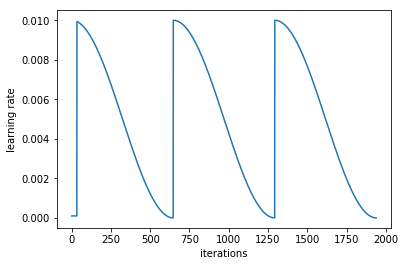

In [20]:
learn.sched.plot_lr()

In [21]:
learn.save('224_lastlayer')

In [22]:
learn.load('224_lastlayer')

In [23]:
learn.unfreeze()

In [24]:
lr=np.array([1e-4,1e-3,1e-2])

In [25]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.033858   0.035644   0.985299  
    1      0.02096    0.028634   0.988975  
    2      0.018324   0.02408    0.988182  
    3      0.016321   0.031732   0.987173  
    4      0.010902   0.027469   0.987245  
    5      0.012697   0.028736   0.986813  
    6      0.011473   0.027398   0.987173  



[array([0.0274]), 0.98717302010521]

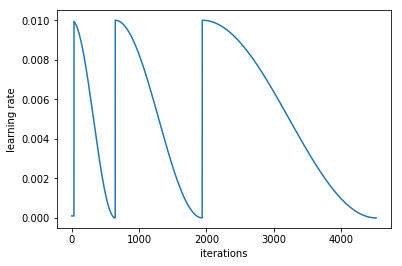

In [26]:
learn.sched.plot_lr()

In [27]:
learn.save('224_all')

In [30]:
learn.model.cpu()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [31]:
learn.save('224_fruits')

In [32]:
learn.load('224_fruits')

In [34]:
learn.model.cuda()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [35]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [36]:
accuracy_np(probs, y)

0.9882539453772429

In [37]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[164   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0   0 164 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]


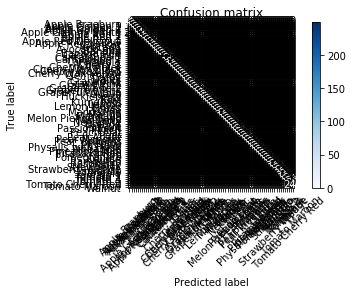

In [39]:
plot_confusion_matrix(cm, data.classes)